# Integrantes

Fernanda Díaz Gutiérrez A01639572

Paul Enrique Alonso Ramírez A01634608

Salvador Bravo Garnica A01068209

Iván Estrada Cárdenas A01643642

Brizeth Alejandra Solano A01742281

# Introducción al data set

El dataset contiene un listado de inmobiliarías seccionadas por estado y código postal. La información se recabó de realtor.com.

[Fuente](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset)

# Objetivo de K-means

K-means es un algoritmo de clustering utilizado para descubrir grupos que no han sido explícitamente etiquetados con la información. Algunas de sus aplicaciones son el agrupamiento de imágenes, detección de anomalías entre otras.

El algoritmo identifica un cierto número de centroides en el dataset. Un centroide es la media arimética de todos los puntos pertenecientes a un cluster.

[Fuente](https://www.nvidia.com/en-us/glossary/data-science/k-means/)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("realtor-data.csv")

In [ ]:
del df["prev_sold_date"]

In [ ]:
df.dropna()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,179000.0
...,...,...,...,...,...,...,...,...,...
16790,for_sale,4.0,2.0,0.09,Bayamon,Puerto Rico,959.0,1100.0,86600.0
16792,for_sale,4.0,3.0,0.07,San Juan,Puerto Rico,921.0,1800.0,149900.0
16793,for_sale,3.0,2.0,0.10,San Juan,Puerto Rico,921.0,1700.0,180000.0
16795,for_sale,4.0,4.0,0.09,Carolina,Puerto Rico,985.0,1190.0,237500.0


**Describe las medidas de centralidad, dispersión, skewness, kutorsis de cada variable**

1. Medidas de centralidad

In [ ]:
median = df[["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]].median()
mode = df[["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]].mode()
mean = df[["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]]. mean()

2. Medidas de dispersión

In [ ]:
var = df[["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]].var()
desvEst = df[["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]].std()
max = df[["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]].max()
min = df[["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]].min()

3. Skewness y kurtosis

In [ ]:
skewness = df[["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]].skew()
kurt = df[["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]].kurtosis()

4. Resumen



In [ ]:
print(f"--- Mediana ---\n{median}")
print(f"--- Moda ---\n{mode}")
print(f"--- Media ---\n{mean}")
print(f"--- Varianza ---\n{var}")
print(f"--- Desviación Estandar ---\n{desvEst}")
print(f"--- Máximo ---\n{max}")
print(f"--- Mínimo ---\n{min}")
print(f"--- Skewness ---\n{skewness}")
print(f"--- Kurtosis ---\n{kurt}")

--- Mediana ---
bed                3.00
bath               2.00
acre_lot           0.23
zip_code         754.00
house_size      1388.00
price         145000.00
dtype: float64
--- Moda ---
   bed  bath  acre_lot  zip_code  house_size     price
0  3.0   2.0      0.08     820.0      1000.0  125000.0
--- Media ---
bed                3.655157
bath               2.333914
acre_lot           5.779423
zip_code         823.600096
house_size      2073.524125
price         448504.630498
dtype: float64
--- Varianza ---
bed           2.355079e+00
bath          1.787333e+00
acre_lot      4.984023e+03
zip_code      3.734487e+06
house_size    1.682340e+08
price         1.700606e+12
dtype: float64
--- Desviación Estandar ---
bed           1.534627e+00
bath          1.336912e+00
acre_lot      7.059761e+01
zip_code      1.932482e+03
house_size    1.297051e+04
price         1.304073e+06
dtype: float64
--- Máximo ---
bed                 33.00
bath                35.00
acre_lot          3600.11
zip_code     

**Grafica dos diagramas de caja y bigote**

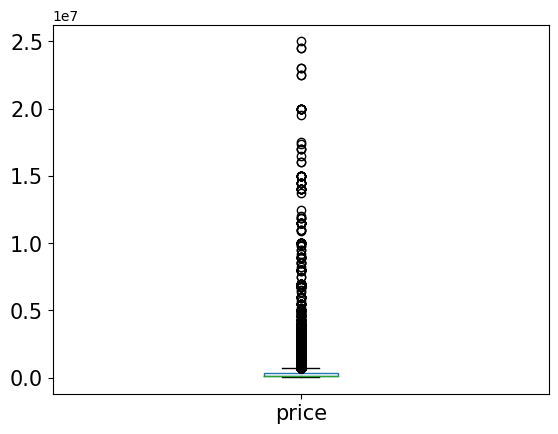

In [ ]:
boxplot1 = df.boxplot(column=['price'],grid=False,fontsize=15)
boxplot1.plot()
plt.show()

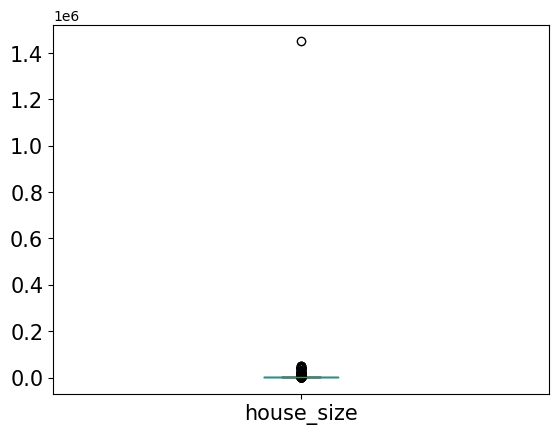

In [ ]:
boxplot2 = df.boxplot(column=['house_size'],grid=False,fontsize=15)
boxplot2.plot()
plt.show()

Encuentra los **outliers por variable**

In [ ]:
def outliers(stats):
  upper_bound = stats['75%'] + 1.5 * (stats['75%'] - stats['25%'])
  print("Upper bound: ", upper_bound)
  for i in stats:
    if i > upper_bound:
      print(i)
  print("")
  low_bound = stats['25%'] - 1.5 * (stats['75%'] - stats['25%'])
  print("Lower bound: ", low_bound)
  for i in stats:
    if i < low_bound:
      print(i)
  print("")

In [ ]:
print("bed: \n")
outliers(df['bed'].describe())

bed: 

Upper bound:  5.5
13119.0
33.0

Lower bound:  1.5
1.0



In [ ]:
print("bath: \n")
outliers(df['bath'].describe())

bath: 

Upper bound:  4.5
13198.0
35.0

Lower bound:  0.5



In [ ]:
print("zip_code: \n")
outliers(df['zip_code'].describe())

zip_code: 

Upper bound:  1280.0
16699.0
1932.4821884090875
95000.0

Lower bound:  320.0



In [ ]:
print("zip_code: \n")
outliers(df['zip_code'].describe())

zip_code: 

Upper bound:  1280.0
16699.0
1932.4821884090875
95000.0

Lower bound:  320.0



In [ ]:
print("house_size: \n")
outliers(df['house_size'].describe())

house_size: 

Upper bound:  4205.625
12850.0
12970.506675541548
1450112.0

Lower bound:  -923.375



In [ ]:
print("price: \n")
outliers(df['price'].describe())

price: 

Upper bound:  682825.0
1304072.8444652408
25000000.0

Lower bound:  -271375.0



Desarrolla y describe un modelo de **K-means** para el dataset.

In [ ]:
from scipy.spatial.distance import cdist

def kmeans(X, k):
    
    # Step 1
    idx = np.random.choice(len(X), k, replace = False)
    centroids = X[idx, :]
    
    while True:
        # Step 2
        distances = cdist(X, centroids, 'euclidean')

        # Step 3
        points = np.array([np.argmin(i) for i in distances])

        # Step 4
        temp_centroids = []

        for cluster in range(k):
            # Update
            temp_cluster_centroid = X[points == cluster].mean(axis = 0)
            temp_centroids.append(temp_cluster_centroid)

        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [ ]:
X = df[["house_size",  "price"]].dropna().to_numpy()
print(X)

[[   920. 105000.]
 [  1527.  80000.]
 [   748.  67000.]
 ...
 [  1798. 395000.]
 [  1229. 210000.]
 [  1387.  11800.]]


In [ ]:
k = 2
points, centroids = kmeans(X, k)

In [ ]:
centroids

array([[2.14268529e+04, 1.13684363e+07],
       [1.91867320e+03, 3.40488730e+05]])

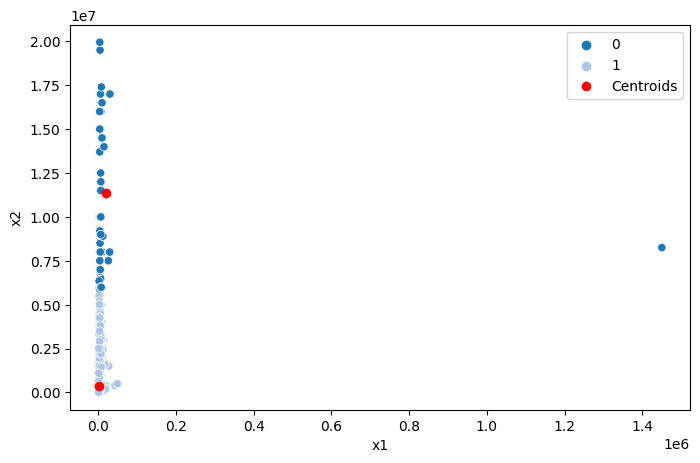

In [ ]:
df= pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

#plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()

plt.show()